In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scout import io
from scout import utils
from scout import plot

In [2]:
%matplotlib notebook

In [255]:
working_dir = '/data/datasets/organoid_phenotyping/analysis/zika_vs_mock/Zika_mock/20190703_14_49_48_eF25_M5_488LP20_561LP160_642LP50/dataset/'
os.listdir(working_dir)

['syto.zarr',
 'Ex0_hist.csv',
 'Ex2_hist.csv',
 'nuclei_binary.zarr',
 'nuclei_probability.zarr',
 'nuclei_fluorescence',
 'segment_ventricles.tif',
 'Ex2_rescaled',
 'nuclei_morphologies.csv',
 'syto_down6x',
 'Ex_1_Em_1_stitched',
 'syto_down6x.tif',
 'niche_labels.npy',
 'Ex_0_Em_0_stitched',
 'Ex1_hist.csv',
 'Ex_2_Em_2_stitched',
 'cyto_profiles.npy',
 'nuclei_foreground.zarr',
 'celltype_names.csv',
 'centroids.npy',
 'nuclei_gating.npy',
 'cyto_profiles_sample.npy',
 'sox2.zarr',
 'niche_names.csv',
 'voxel_size.csv',
 'mesh_ventricles.pkl',
 'tbr1.zarr',
 'niche_proximities.npy',
 'Ex0_rescaled',
 'segment_foreground.tif',
 'cyto_sample_index.npy',
 'Ex1_rescaled',
 'centroids_um.npy']

# Show all detected nuclei on syto image

In [256]:
syto_path = 'syto.zarr'

syto_zarr = io.open(os.path.join(working_dir, syto_path))
syto_zarr.shape

(900, 5359, 5359)

In [257]:
centers_path = 'centroids.npy'

centers = np.load(os.path.join(working_dir, centers_path))
centers.shape

(1765881, 3)

<IPython.core.display.Javascript object>


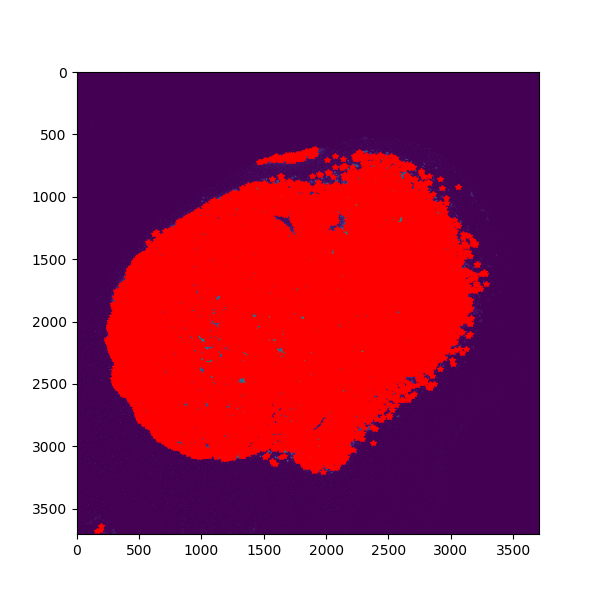

In [254]:
# Show detections overlay
plt.figure(figsize=(6, 6))
plot.zprojection(syto_zarr, centers, zlim=[300, 305])

# Show SOX2, TBR1, DNs on each channel

In [258]:
celltype_path = 'nuclei_gating.npy'

celltype_labels = np.load(os.path.join(working_dir, celltype_path))
celltype_labels.shape

(1765881, 2)

In [259]:
dp_count = np.logical_and(celltype_labels[:, 0], celltype_labels[:, 1]).sum()
dp_count / len(celltype_labels)

0.016212304226615497

SOX2 cells

In [260]:
sox2_path = 'sox2.zarr'

sox2_zarr = io.open(os.path.join(working_dir, sox2_path))
sox2_zarr.shape

(900, 5359, 5359)

In [261]:
sox2_idx = np.where(celltype_labels[:, 0])[0]

sox2_centers = centers[sox2_idx]
sox2_centers.shape

(894087, 3)

<IPython.core.display.Javascript object>


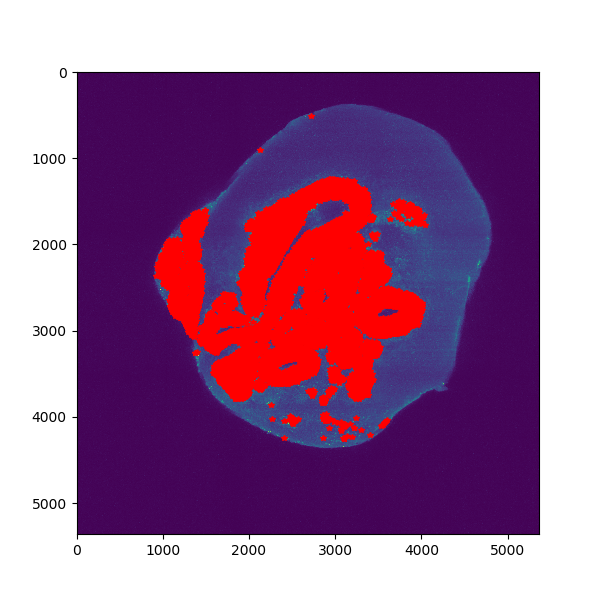

In [262]:
# Show detections overlay
plt.figure(figsize=(6, 6))
plot.zprojection(sox2_zarr, sox2_centers, zlim=[300, 305], clim=[0, 1])

TBR1 cells

In [263]:
tbr1_path = 'tbr1.zarr'

tbr1_zarr = io.open(os.path.join(working_dir, tbr1_path))
tbr1_zarr.shape

(900, 5359, 5359)

In [264]:
tbr1_idx = np.where(celltype_labels[:, 1])[0]

tbr1_centers = centers[tbr1_idx]
tbr1_centers.shape

(310439, 3)

<IPython.core.display.Javascript object>


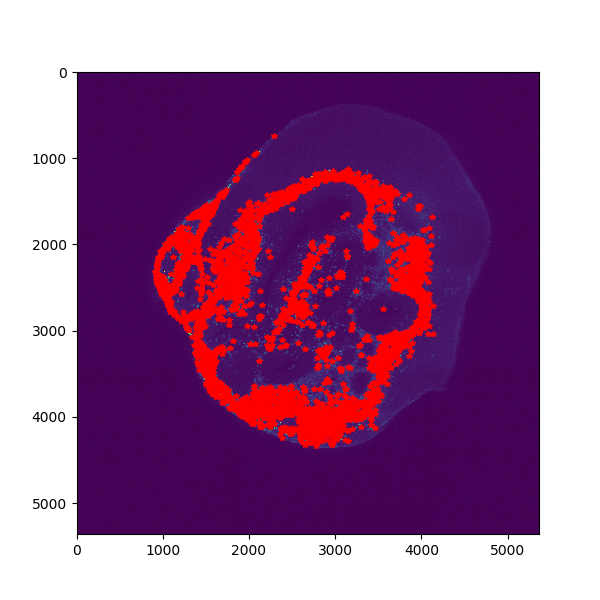

In [265]:
# Show detections overlay
plt.figure(figsize=(6, 6))
plot.zprojection(tbr1_zarr, tbr1_centers, zlim=[300, 305], clim=[0, 2.0])

DN cells

In [100]:
dn_idx = np.where(np.logical_and(celltype_labels[:, 0] == 0, celltype_labels[:, 1] == 0))[0]

dn_centers = centers[dn_idx]
dn_centers.shape

(6524038, 3)

In [ ]:
# Show detections overlay
plt.figure(figsize=(6, 6))
plot.zprojection(syto_zarr, dn_centers, zlim=[400, 405])

# Show DN segregation by niche analysis

In [101]:
niche_labels = np.load(os.path.join(working_dir, 'niche_labels.npy'))
niche_labels.shape

(8804676,)

The "core" niche

In [102]:
core_idx = np.where(niche_labels == 0)[0]
core_centers = centers[core_idx]

core_centers.shape

(1254404, 3)

<IPython.core.display.Javascript object>


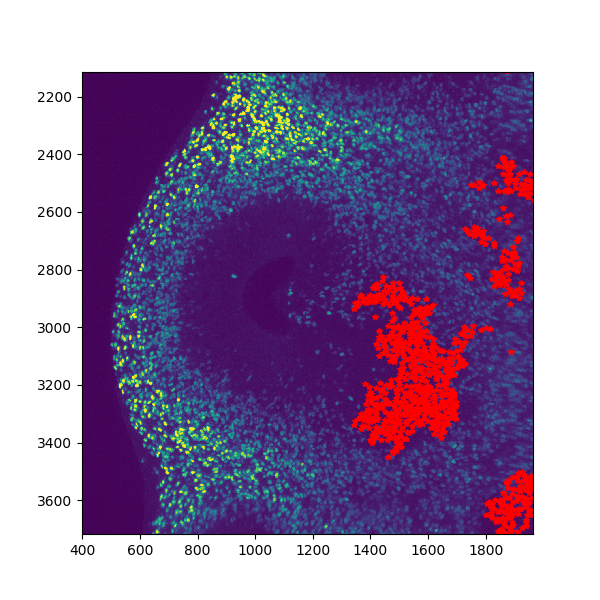

In [105]:
# Show detections overlay
plt.figure(figsize=(6, 6))
plot.zprojection(tbr1_zarr, core_centers, zlim=[300, 305], clim=[0, 2])

This seems to corespond to the non-ventricle regions, not necessarily a necrotic core.

The "intermediates"

In [106]:
from scout.utils import read_csv

In [107]:
names = read_csv(os.path.join(working_dir, 'niche_names.csv'))
names

['DN', 'SOX2', 'TBR1', 'DP', 'MidTBR1', 'MidSOX2', 'MidInter']

In [108]:
inter_idx = np.where(niche_labels == 6)[0]
inter_centers = centers[inter_idx]

inter_centers.shape

(2737218, 3)

<IPython.core.display.Javascript object>


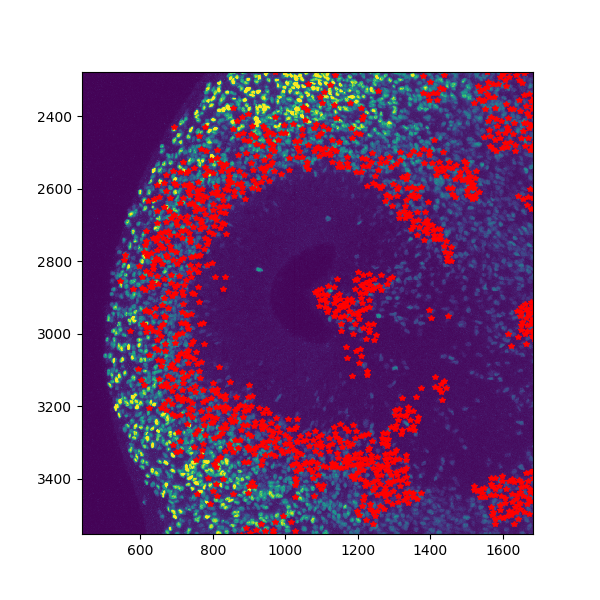

In [109]:
# Show detections overlay
plt.figure(figsize=(6, 6))
plot.zprojection(tbr1_zarr, inter_centers, zlim=[300, 305], clim=[0, 2])

Look at DNs in the top right niche

In [139]:
topright_idx = np.where(niche_labels == 3)[0]
topright_centers = centers[topright_idx]
topright_celltypes = celltype_labels[topright_idx]
topright_dn_idx = np.where(np.logical_and(topright_celltypes[:, 0] == 0, topright_celltypes[:, 1] == 0))[0]
topright_dn_centers = topright_centers[topright_dn_idx]

topright_dn_centers.shape

(17, 3)

<IPython.core.display.Javascript object>


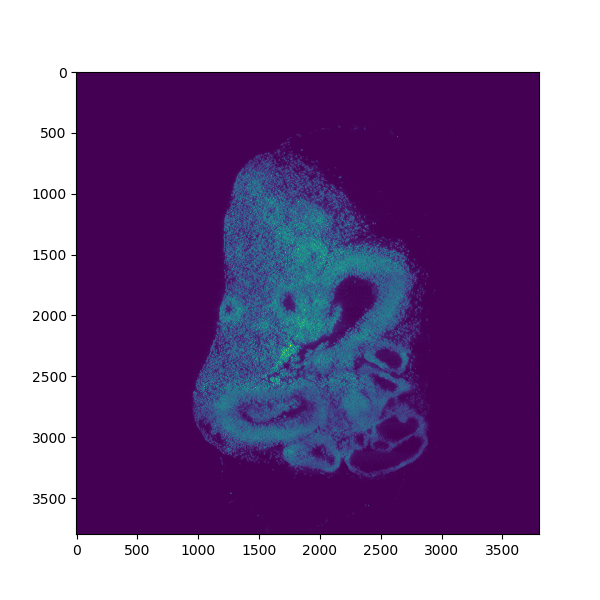

In [82]:
# Show detections overlay
plt.figure(figsize=(6, 6))
plot.zprojection(syto_zarr, topright_dn_centers, zlim=[600, 605])